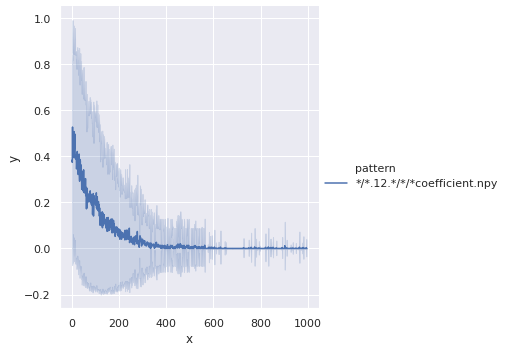

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

%matplotlib inline
ns = [12]
def df(pattern):
    path = next(Path('/home/jovyan/').glob(pattern))
    array = np.load(str(path))
    n, d = array.shape
    indices = np.tile(np.arange(d), n)
    return pd.DataFrame(dict(y=array.flatten(), x=indices, pattern=pattern))


def plot(*patterns, kind="line", ci="sd",**kwargs):
    data = pd.concat(df(p) for p in patterns)
    sns.relplot(x="x", y="y", hue="pattern", kind=kind, ci=ci, data=data);

for n in ns:
    plot(f'*/*.{n}.*/*/*coefficient.npy')

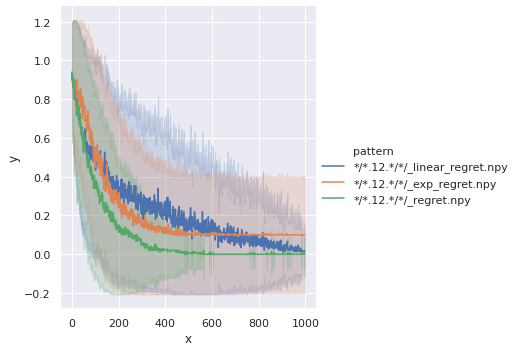

In [2]:
for n in ns:
    plot(f'*/*.{n}.*/*/_linear_regret.npy', f'*/*.{n}.*/*/_exp_regret.npy', f'*/*.{n}.*/*/_regret.npy')

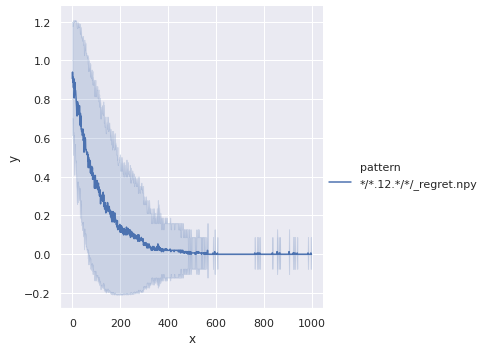

In [3]:
plot(*[f'*/*.{n}.*/*/_regret.npy' for n in ns])

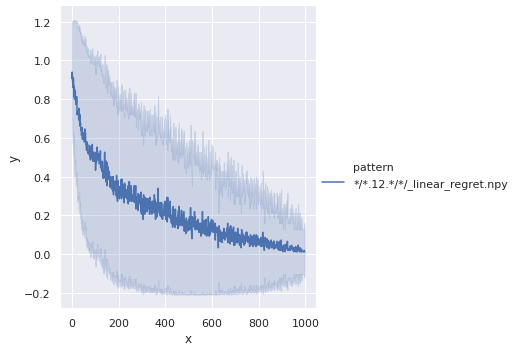

In [4]:
plot(*[f'*/*.{n}.*/*/_linear_regret.npy' for n in ns])

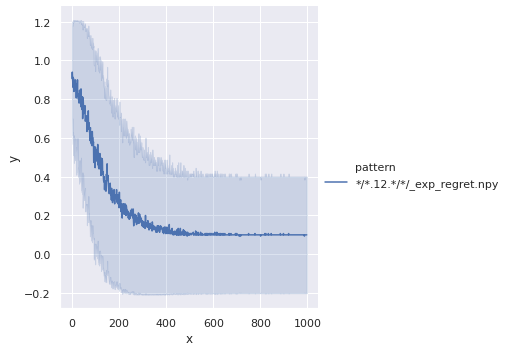

In [5]:
plot(*[f'*/*.{n}.*/*/_exp_regret.npy' for n in ns])